<a href="https://colab.research.google.com/github/mikgroup/bpt_paper/blob/main/figure_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Beat Pilot Tone: Simultaneous Radio-Frequency Motion Sensing and Imaging at Arbitrary Frequencies in MRI**
**Authors:** Suma Anand<sup>1</sup>, Michael Lustig<sup>1</sup>

<sup>1</sup> University of California, Berkeley

This notebook reproduces the figures and processing from the manuscript "Beat Pilot Tone: Simultaneous Radio-Frequency Motion Sensing and Imaging at Arbitrary Frequencies in MRI" submitted to Magnetic Resonance in Medicine.

Author of this demo: [Suma Anand](https://people.eecs.berkeley.edu/~sanand/), sanand@berkeley.edu

# Install necessary packages

In [1]:
!pip install sigpy --quiet
!pip install ipympl --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.8 MB/s eta 0:00:00


In [3]:
# For data processing
import numpy as np
import os
import sys

# For plotting
import matplotlib.pyplot as plt # Enable matplotlib widgets
from google.colab import output
output.enable_custom_widget_manager()

# For downloading data in zipfile format
import gdown
import zipfile

# Custom modules from git repo
if not os.path.exists("bpt_paper"):
  !git clone https://github.com/mikgroup/bpt_paper.git
sys.path.append("bpt_paper")
import data_processing as proc
import figure_plotting as pl
import run_bpt as run
import scipy.io as sio
import cfl

Cloning into 'bpt_paper'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 32 (delta 11), reused 17 (delta 3), pack-reused 0
Receiving objects: 100% (32/32), 2.84 MiB | 9.30 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [5]:
# Define plot parameters
plt.rcParams.update({'axes.spines.right':False,
                    'axes.spines.top':False,
                    'font.size': 14,
                    'axes.titlesize':20, # fontsize of the axes title
                    'axes.labelsize':20,
                    'axes.linewidth':2,
                    'legend.fontsize':18,
                    'xtick.labelsize':18,
                    'ytick.labelsize':18,
                    'lines.linewidth':2
                    })

# Download and extract the data

In [6]:
# Download the data
url = 'https://drive.google.com/uc?id=11O9XIJHzlimX7ezTIptXf7GPogSagw6v'
output = 'data.zip'
# Note: this is slow!! Zip file is ~8.3GB
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=11O9XIJHzlimX7ezTIptXf7GPogSagw6v
To: /content/data.zip
100%|██████████| 8.24G/8.24G [01:04<00:00, 128MB/s]


'data.zip'

In [7]:
# Extract data to directory
# Also slow
!tar -xzvf data.zip >/dev/null 2>&1 # Suppresses output

In [9]:
# Check that the data was extracted properly
!ls data

bpt_acq  concept  head	  resp	snr	  vibration
cardiac  dbcg	  README  sim	supp_air


In [10]:
# Set data directory
data_dir = "./data"

# Fig 1: Concept Figure

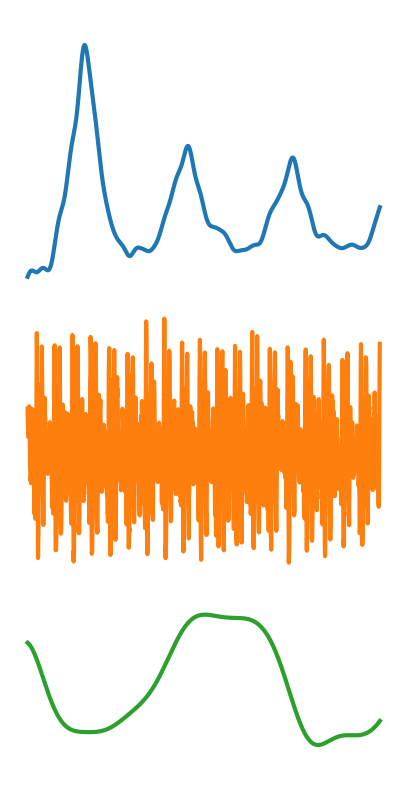

In [11]:
# Plot respiratory, cardiac, and head motion in the same plot
pl.plot_motion_signals(inpdir=os.path.join(data_dir,"concept"), shift=-5)

# Fig 2: BPT Acq

In [12]:
# Plot params for this figure
plt.rcParams.update({'axes.spines.right':False,
                    'axes.spines.top':False,
                    'axes.labelsize':18,
                    'xtick.labelsize':16,
                    'lines.linewidth':2
                    })
# Input directory
inpdir = os.path.join(data_dir, "bpt_acq")

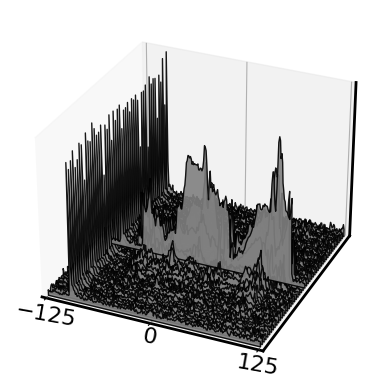

In [13]:
# Plot 3D ksp vs time and frequency graph
pl.plot_ksp_f(inpdir)

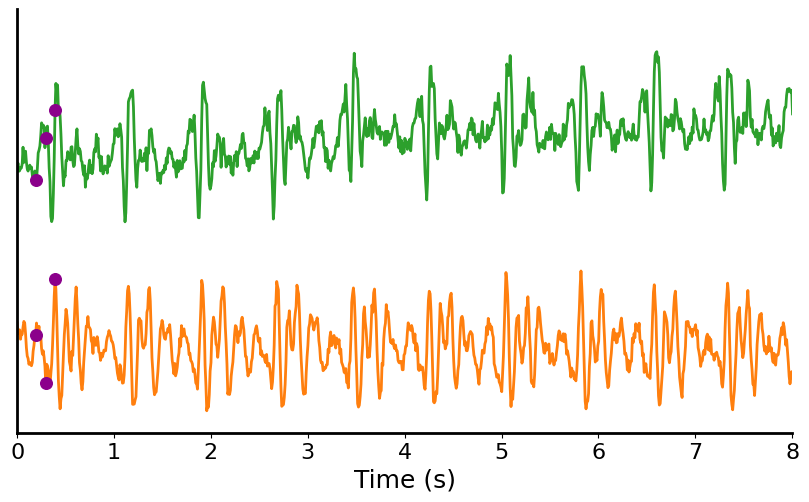

In [14]:
# Plot cardiac signals with overlaid purple points
pl.plot_cardiac_signals(inpdir)

# Fig 3: Rocker simulation

## Fig 3c: H-field magnitudes

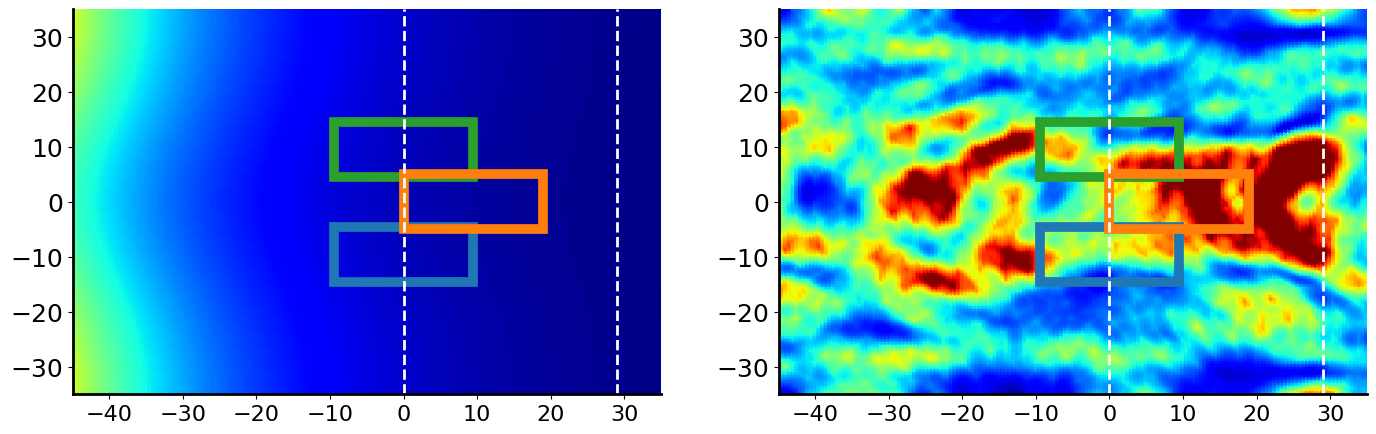

In [15]:
# Plot H-field magnitudes at 127.8MHz and 2.4/2.5278GHz
inpdir = os.path.join(data_dir, "sim", "h_fields")
pl.plot_field_w_coils(inpdir, figsize=(16.7,5), xlim=[-45,35], ylim=[-35,35])

## Fig 3d, 3e: Simulated vs measured data

In [16]:
# Update plot params
plt.rcParams.update({'axes.titlesize':18, # fontsize of the axes title
                    'figure.titlesize':18, # suptitle
                    'axes.labelsize':16,
                    'legend.fontsize':14,
                    'xtick.labelsize':14,
                    'ytick.labelsize':14,
                    'lines.linewidth':3
                    })

In [17]:
# Load simulated data
inpdir = os.path.join(data_dir, "sim", "sim_bpt")
fname = "log_periodic_pa_{}.csv".format(0)
flux, freqs, pos = proc.get_phantom_flux(inpdir, fname, Npoints=81*4)
flux_mult_mag, flux_mult_ph = proc.get_phantom_flux_mult(flux, freqs)
f_combined = proc.get_f_combined(freqs)

In [18]:
# Load measured data from raw data folder
cutoff = 5 # Hz
tr = 4.3e-3
inpdir = os.path.join(data_dir, "sim", "meas_bpt", "raw_data")
scan_type = "long"
experiment_list = np.flip(["2400_{}_85".format(scan_type), "1800_{}_75".format(scan_type),
               "1200_{}_59".format(scan_type), "800_{}_53".format(scan_type),
               "300_{}_64".format(scan_type), "127_{}_23".format(scan_type)])

pt_mag = proc.load_rocker_data(inpdir, experiment_list, tr_dict=None, cutoff=cutoff)

PT exists! Reading file ./data/sim/meas_bpt/raw_data/127_long_23/pt_ravel.cfl
PT exists! Reading file ./data/sim/meas_bpt/raw_data/127_long_23/pt_ravel.cfl


/content/bpt_paper/data_processing.py:86: RuntimeWarning: invalid value encountered in divide
  pt_mod = (pt/np.mean(pt,axis=0)-1)*100


PT exists! Reading file ./data/sim/meas_bpt/raw_data/300_long_64/pt_ravel.cfl
PT exists! Reading file ./data/sim/meas_bpt/raw_data/800_long_53/pt_ravel.cfl
PT exists! Reading file ./data/sim/meas_bpt/raw_data/1200_long_59/pt_ravel.cfl
PT exists! Reading file ./data/sim/meas_bpt/raw_data/1800_long_75/pt_ravel.cfl
PT exists! Reading file ./data/sim/meas_bpt/raw_data/2400_long_85/pt_ravel.cfl


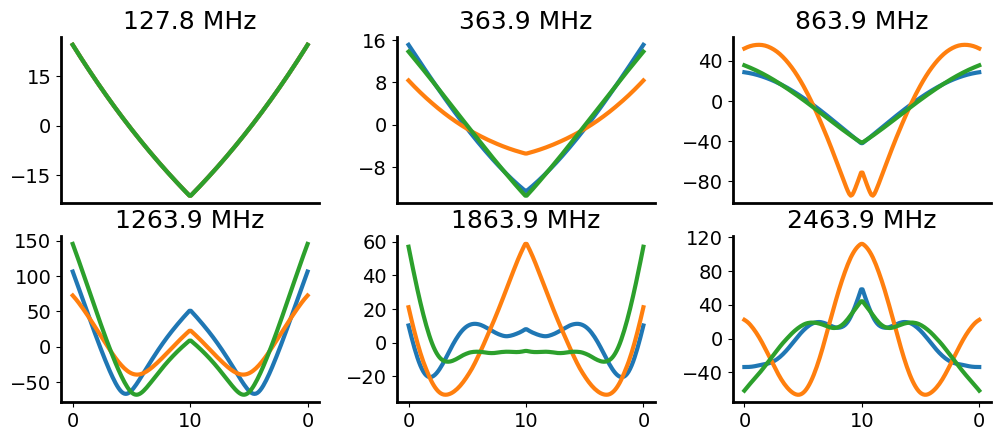

In [19]:
# Plot simulated BPT data
inpdir = os.path.join(data_dir, "sim", "sim_bpt")
pl.plot_sim(inpdir, xlims=[0,10], mirror=True, figsize=(12,5))

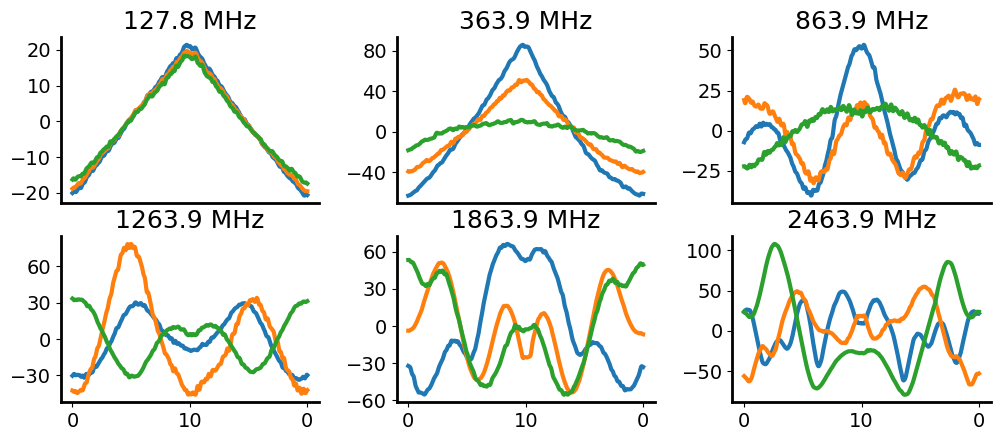

In [20]:
# Plot measured BPT data
inpdir = os.path.join(data_dir, "sim", "meas_bpt")
pl.plot_meas_data(pt_mag, f_combined, figsize=(12,5), c=np.array([9,8,10]))

# Fig 5: Rocker vibration

In [21]:
# Load data
inpdir = os.path.join(data_dir, "vibration", "raw_data")
scan_type = "short"
experiment_list = np.flip(["2400_{}_85".format(scan_type), "1800_{}_75".format(scan_type),
               "1200_{}_59".format(scan_type), "800_{}_53".format(scan_type),
               "300_{}_64".format(scan_type), "127_{}_23".format(scan_type)])
pt_mag = proc.load_rocker_data(inpdir, experiment_list, tr_dict=None, cutoff=5)

PT exists! Reading file ./data/vibration/raw_data/127_short_23/pt_ravel.cfl
PT exists! Reading file ./data/vibration/raw_data/127_short_23/pt_ravel.cfl
PT exists! Reading file ./data/vibration/raw_data/300_short_64/pt_ravel.cfl
PT exists! Reading file ./data/vibration/raw_data/800_short_53/pt_ravel.cfl
PT exists! Reading file ./data/vibration/raw_data/1200_short_59/pt_ravel.cfl
PT exists! Reading file ./data/vibration/raw_data/1800_short_75/pt_ravel.cfl
PT exists! Reading file ./data/vibration/raw_data/2400_short_85/pt_ravel.cfl


## Fig 5b: Freq sweep

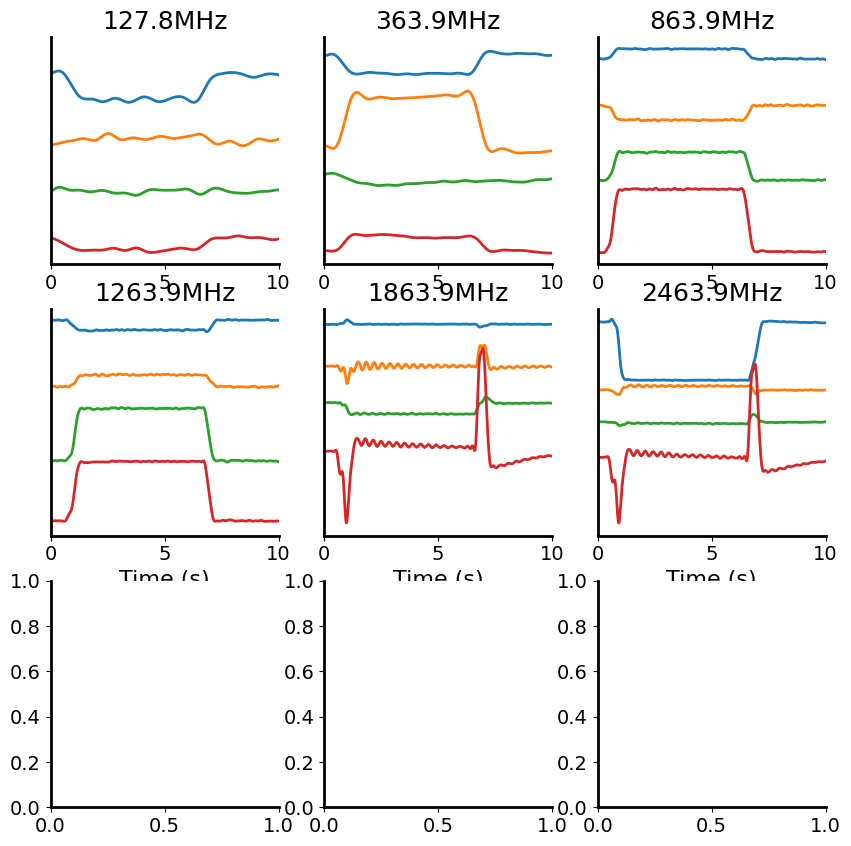

<Figure size 640x480 with 0 Axes>

In [22]:
# Plot Figure 5b
tr = 4.3e-3
cutoffs=[1, 1, 5, 5, 5, 5] # Low-pass filter cutoff
t_starts = np.flip(np.array([1.5, 3.6, 21, 6.5, 2, 3]))
f_combined = proc.get_f_combined()

# Plot
pl.plot_vibration(pt_mag, t_starts, f_combined, period=10, tr=tr,
               shifts=[-20, -100, -300, -300, -500, -300],
               c_inds=np.arange(16,20), lw=2, cutoffs=cutoffs)

## Figure 5e: Accelerometer comparison

In [23]:
folder_list = ["rocker_1800_2", "rocker_2400_mini"]
pt_mag = proc.load_rocker_data(inpdir, folder_list, tr_dict=None, cutoff=15)
accel_d = proc.load_and_integrate_accel(inpdir, folder_list, tr=8.7e-3, cutoff=3)

PT exists! Reading file ./data/vibration/raw_data/rocker_1800_2/pt_ravel.cfl
PT exists! Reading file ./data/vibration/raw_data/rocker_1800_2/pt_ravel.cfl
PT exists! Reading file ./data/vibration/raw_data/rocker_2400_mini/pt_ravel.cfl


[<matplotlib.lines.Line2D object at 0x7fb7baf9eef0>, <matplotlib.lines.Line2D object at 0x7fb7baf9c700>, <matplotlib.lines.Line2D object at 0x7fb7baf9d360>, <matplotlib.lines.Line2D object at 0x7fb7baf9da80>, <matplotlib.lines.Line2D object at 0x7fb7baf9d7b0>]
[<matplotlib.lines.Line2D object at 0x7fb7baf9f8e0>, <matplotlib.lines.Line2D object at 0x7fb7baf9d090>, <matplotlib.lines.Line2D object at 0x7fb7baf9f250>, <matplotlib.lines.Line2D object at 0x7fb7baf9e830>, <matplotlib.lines.Line2D object at 0x7fb7baf9df30>]


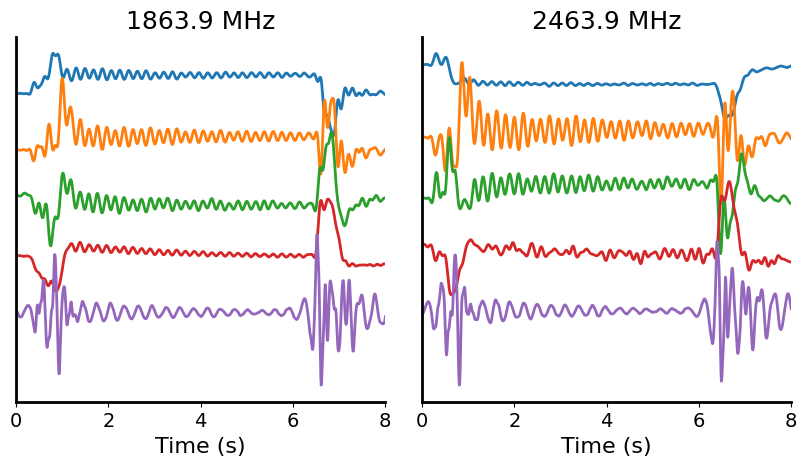

<Figure size 640x480 with 0 Axes>

In [25]:
pl.plot_accel_comparison(pt_mag, accel_d, coil_inds=np.arange(16,20), start_times=[3, 5.3], time_len=8, tr=8.7e-3)
plt.show()

# Fig 6: Respiratory

In [26]:
# Get percent mod in mag and phase
inpdir = os.path.join(data_dir, "resp")
ref_coil = 0
tr = 4.4e-3
threshold = 0.2 # For extracting PT
cutoff = 2 # Hz

# Load PT obj mag, phase, and modulation
fb_2400 = run.load_bpt_mag_phase(inpdir, tr=tr, ref_coil=ref_coil, threshold=threshold, lpfilter=True, cutoff=cutoff)

PT exists! Reading file ./data/resp/pt_ravel.cfl


/content/bpt_paper/data_processing.py:86: RuntimeWarning: invalid value encountered in divide
  pt_mod = (pt/np.mean(pt,axis=0)-1)*100


## Fig 6a: Percent mod during breathing

[None, None, None, None]

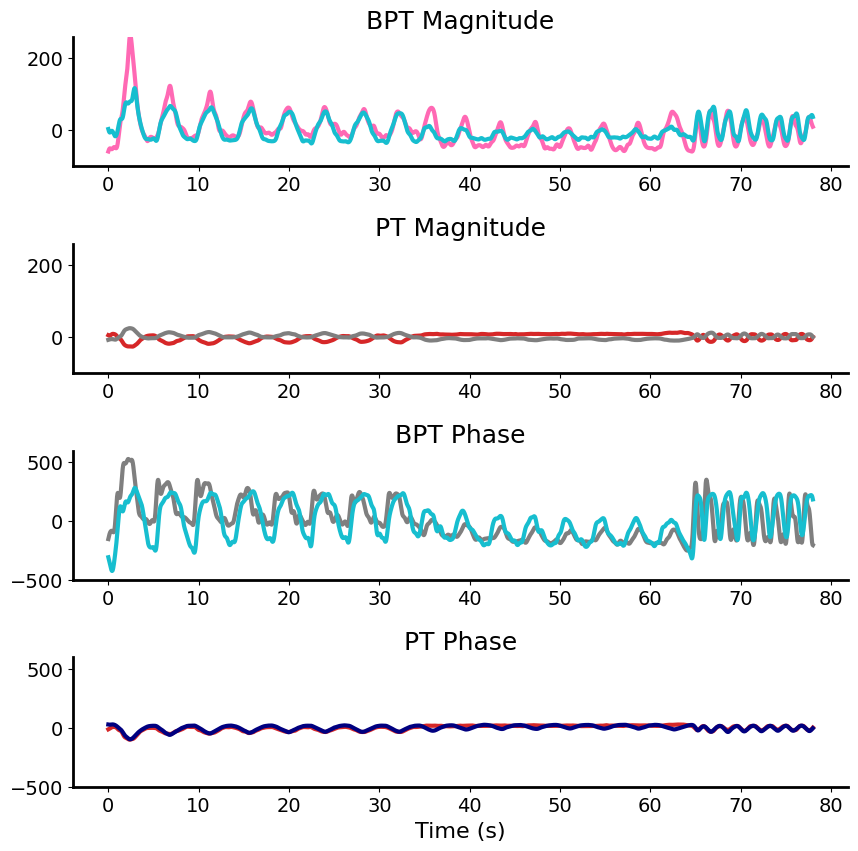

In [28]:
# Respiratory motion
axs_resp = pl.plot_resp(fb_2400, cutoff=2, t_lims=[0,78], figsize=(10,10), num_max=2)
# Adjust ylims
[axs_resp[i].set_ylim([-100,260]) for i in [0,1]]
[axs_resp[i].set_ylim([-500,600]) for i in [2,3]]
[axs_resp[i].xaxis.set_major_locator(plt.MaxNLocator(10)) for i in range(4)]

## Figure 6c: Percent mod during bulk motion

[None, None, None, None]

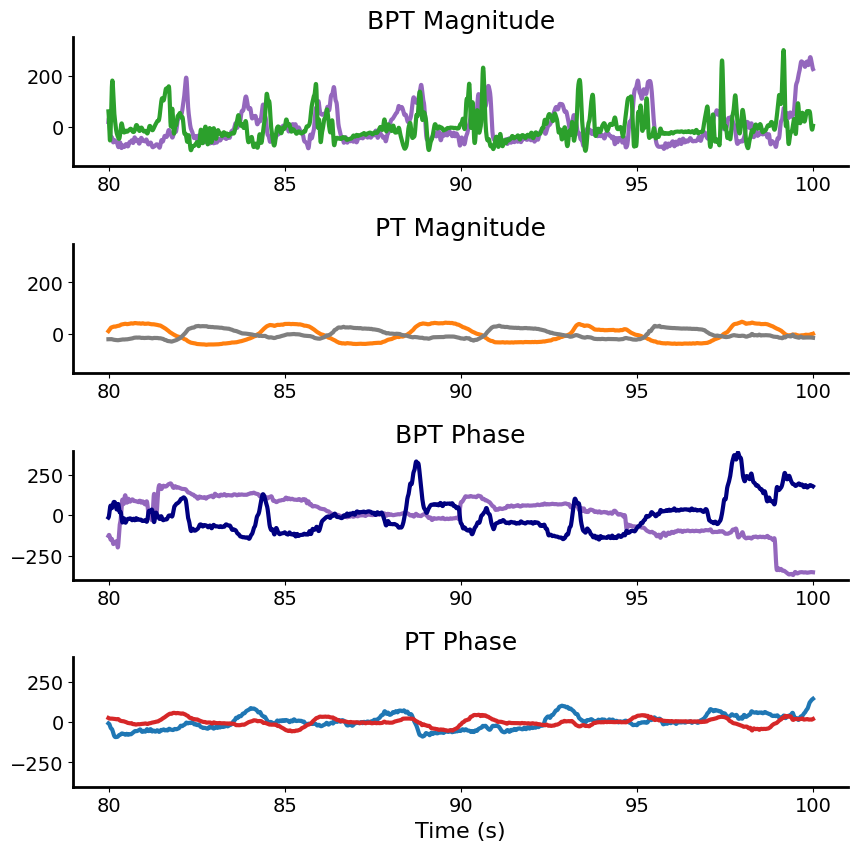

In [29]:
# Bulk motion
axs_bulk = pl.plot_resp(fb_2400, cutoff=14, t_lims = [80,100], figsize=(10,10), num_max=2)
# Adjust ylims
[axs_bulk[i].set_ylim([-150,350]) for i in [0,1]]
[axs_bulk[i].set_ylim([-400,400]) for i in [2,3]]
[axs_bulk[i].xaxis.set_major_locator(plt.MaxNLocator(5)) for i in range(4)]

## Figure 6d: image overlay

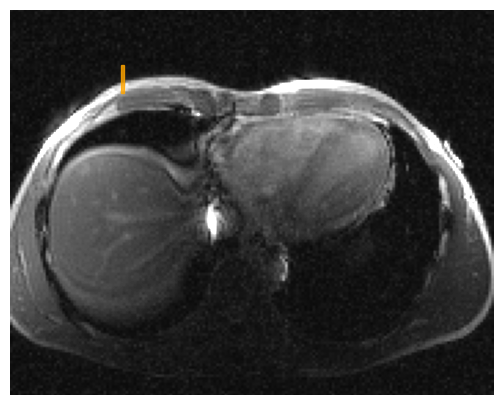

In [30]:
# Plot image with patch on top
img_crop_rss = pl.plot_img_patch(inpdir, start=[80,40])

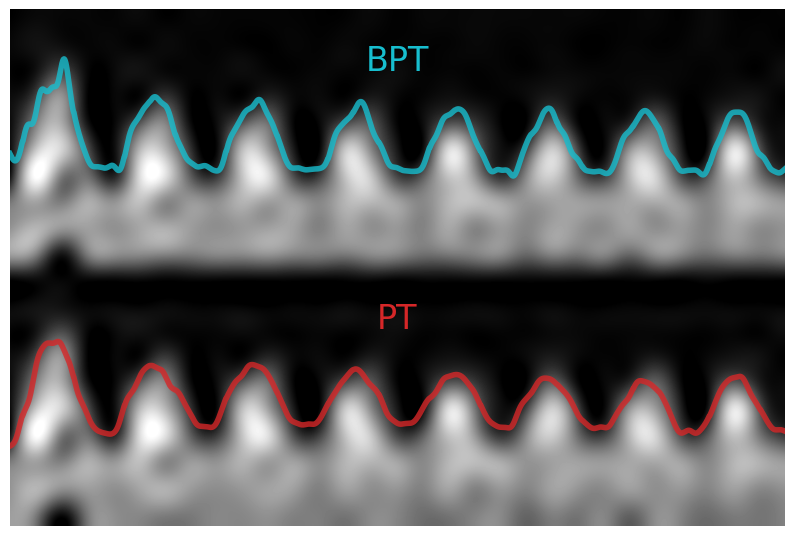

In [31]:
# Plot BPT and PT overlaid on image patch
pl.plot_bpt_pt_overlay(img_crop_rss, fb_2400,
                       start=[80,40],
                       p_size=[10,1],
                       scales = [-0.02,0.02],
                       shifts = [7.8,4],
                       c=[9,3])

## Figure 6e: PCA Trajectories

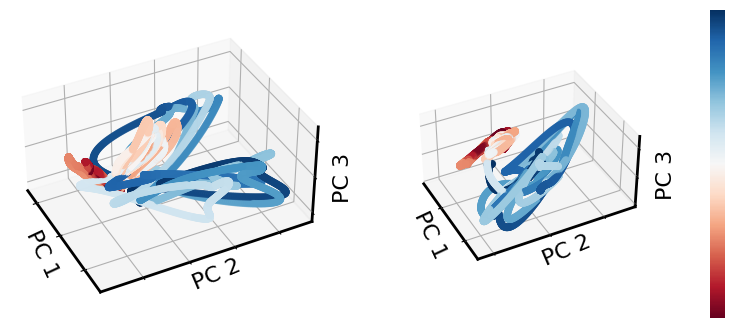

In [32]:
# Plot resp and bulk motion in PC space
k = 3
tr = 4.4e-3
t_start, t_end = [50,100]
n_start, n_end = [int(t_start/tr), int(t_end/tr)]

# Get BPT and PT
bpt = proc.normalize_c(fb_2400.pt_mag_filtered[0,n_start:n_end,...],var=False)
pt = proc.normalize_c(fb_2400.pt_mag_filtered[1,n_start:n_end,...], var=False)

# Take pca
bpt_pca, bpt_var = proc.get_pca(bpt, pt2=None, n_components=k)
pt_pca, pt_var = proc.get_pca(pt, pt2=None, n_components=k)
pt_pcas = [pt_pca, bpt_pca]
fig, axs = pl.plot_pca_combined(pt_pcas, tr=4.4e-3, figsize=(10,4), colorbar=True)

# Fig 7: Cardiac

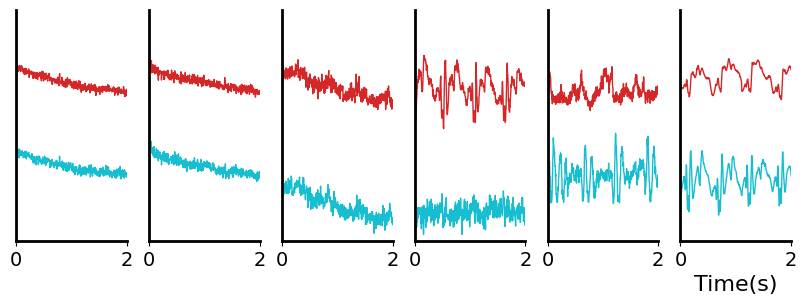

In [33]:
# Fig 7a - raw cardiac
inpdir = os.path.join(data_dir, "cardiac")
pl.plot_raw_cardiac(inpdir,
                    outdir_list = np.array([127, 300, 800, 1200, 1800, 2400]).astype(str),
                    trs = np.array([4.312, 4.342, 4.321, 4.32, 4.326, 4.33])*1e-3,
                    titles = ["127.8MHz", "300MHz", "800MHz", "1.2GHz","1.8GHz","2.4GHz"],
                    t_start=0, t_end=2, shift=-8, num_max=2)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: Futu

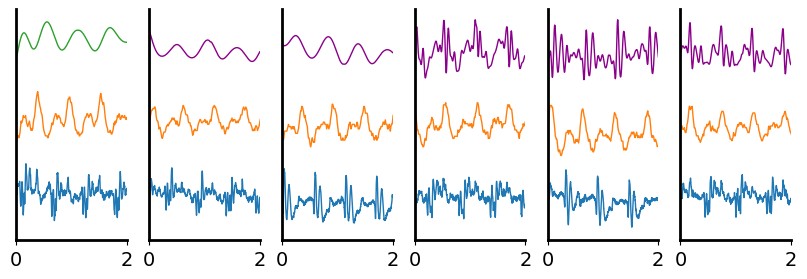

In [36]:
# Fig 7b - cardiac after PCA, ICA, and filtering
# Note - this is accurate up to a sign
pl.plot_cardiac_ica(inpdir,
                    outdir_list = np.array([127, 300, 800, 1200, 1800, 2400]).astype(str),
                    trs = np.array([4.312, 4.342, 4.321, 4.32, 4.326, 4.33])*1e-3,
                    titles = ["127.8MHz", "300MHz", "800MHz", "1.2GHz","1.8GHz","2.4GHz"],
                    t_start=0, t_end=2, shift=-8)

# Fig 8: dBCG

## Fig 8c: BPT vs Physio Data

In [37]:
plt.rcParams.update({'axes.spines.left':False})

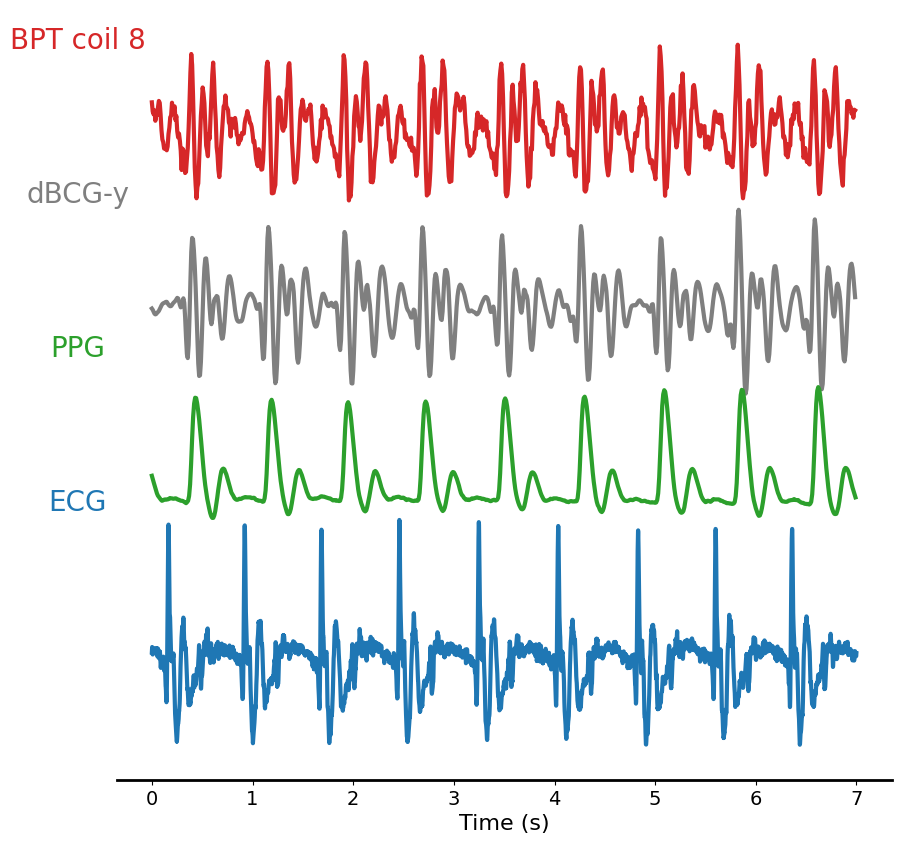

In [38]:
inpdir = os.path.join(data_dir, 'dbcg')
tr = 8.7e-3
cutoff = 4

# Load data
bpt = np.squeeze(cfl.readcfl(os.path.join(inpdir,"pt_ravel")))
accel, _ = proc.get_accel_data(inpdir)
accel_d = proc.get_accel_d(accel, tr=tr, cutoff=cutoff)
pl.plot_8c(inpdir, tr=tr, cutoff=cutoff, c=[30,24])

## Fig 8e: BPT vs dBCG

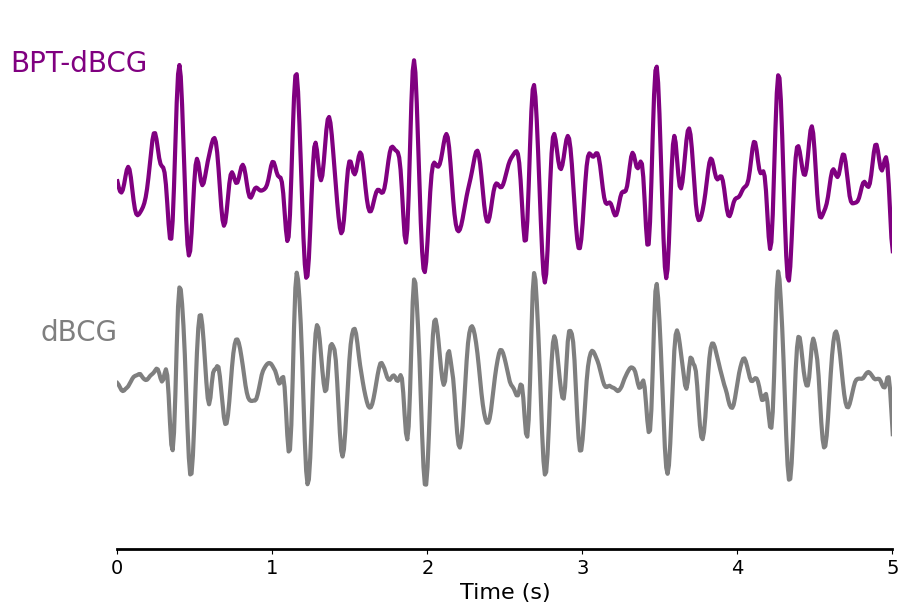

In [39]:
# Regular
pl.plot_accel_bpt(bpt, accel_d, xlim=[0,5], v_shift=0.5, start_loc=0.9, figsize=(10,7))

(0.0, 1.0, -8.903960773887867, 4.127750716294343)

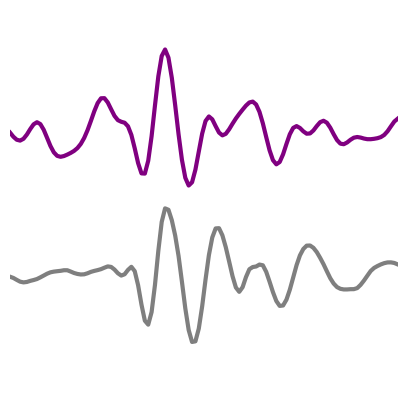

In [40]:
# Zoomed in
pl.plot_accel_bpt(bpt, accel_d, xlim=[0,1], label=False, figsize=(5,5))
plt.axis("off")

# Fig 9: Head

In [43]:
# Put the spine back
plt.rcParams.update({'axes.spines.left':True})

In [45]:
# Plot time-domain and PC-domain plots on magnitude PCs
inpdir = os.path.join(data_dir, "head")
folder_list = ["volunteer_2pt4_ax",  "multi_pt_ax",
                "volunteer_2pt4_sag","multi_pt_sag"]
tr = 4.4e-3
fnames = ["pt", "bpt"]
folders = [[1,3],[0,2]]
pt_pcas = []

for fname, folder in zip(fnames, folders):
    # Extract artifact-corrected PTs
    pt_all = proc.get_corr_pt(folder_list, inpdir=inpdir, filt=True, cutoff=0.5) # Zero mean, corrected for artifact

    # Stack all PTs together (2 antennas + 2 motions)
    pt = proc.get_norm_pt(pt_all, f_idx=folder, t_start=10, t_end=24, tr=tr, mtype='all')

    # PCA
    pt_pca, var_exp = proc.get_pca(pt, None, n_components=3)
    pt_pcas.append(pt_pca)

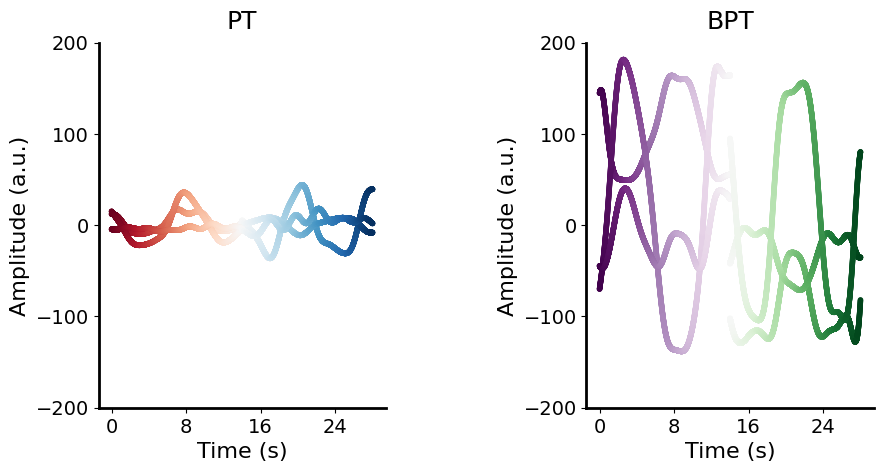

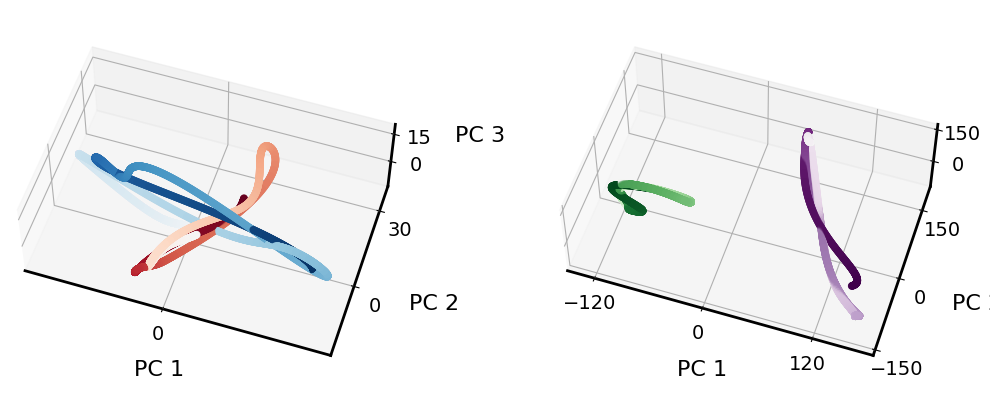

In [46]:
# Plot PCA in time and PC space
pl.plot_head_pca_combined(pt_pcas, tr=4.4e-3, figsizes=[(10,5),(12,6)])

# Fig 10: SNR and Artifacts

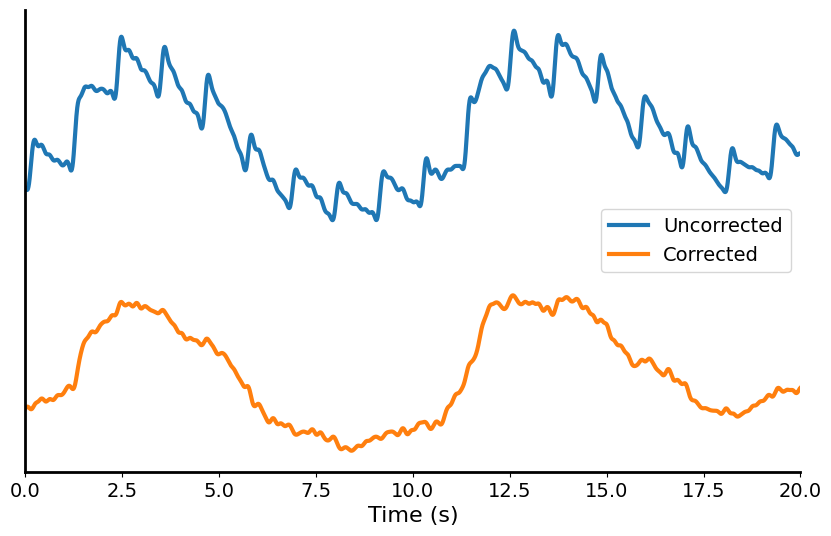

In [47]:
# Artifacts
inpdir = os.path.join(data_dir, "head")
pl.plot_artifacts(inpdir)

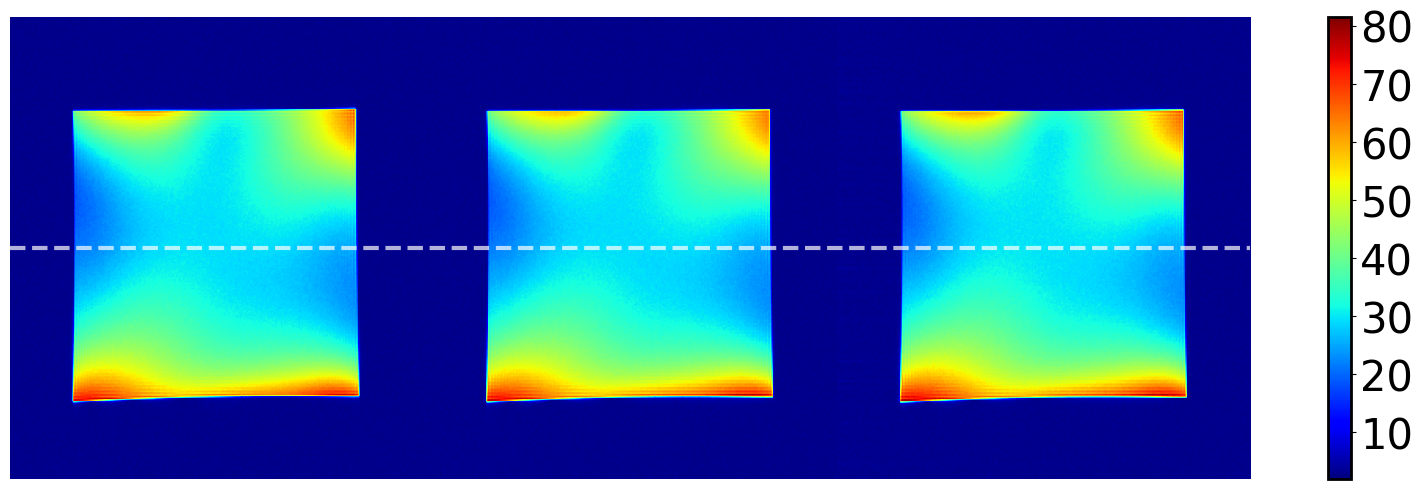

In [49]:
# SNR
inpdir = os.path.join(data_dir, "snr")
mdict = sio.loadmat(os.path.join(inpdir,"snr.mat"))
snr_img = mdict['snr_cov_cat']
snr_cov = mdict['snr_cov_crop']
pl.plot_snr(snr_img, snr_cov, figsize=(20,6))

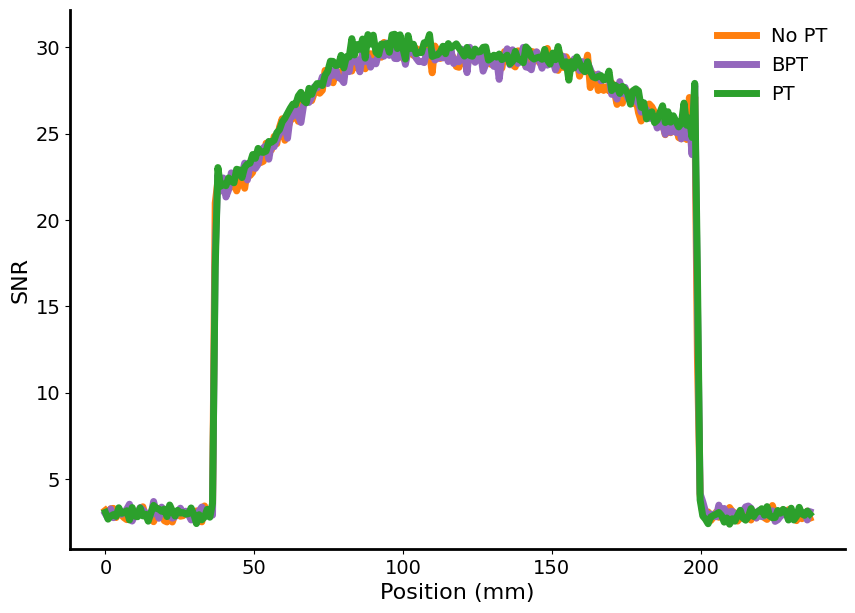

In [50]:
# Line plot
pl.plot_line_plot(snr_cov, figsize=(10,7))

# Supplementary Fig S1 - BPT with AIR coil

PT exists! Reading file ./data/supp_air/pt_ravel.cfl
PT exists! Reading file ./data/supp_air/pt_ravel.cfl


/content/bpt_paper/data_processing.py:86: RuntimeWarning: invalid value encountered in divide
  pt_mod = (pt/np.mean(pt,axis=0)-1)*100


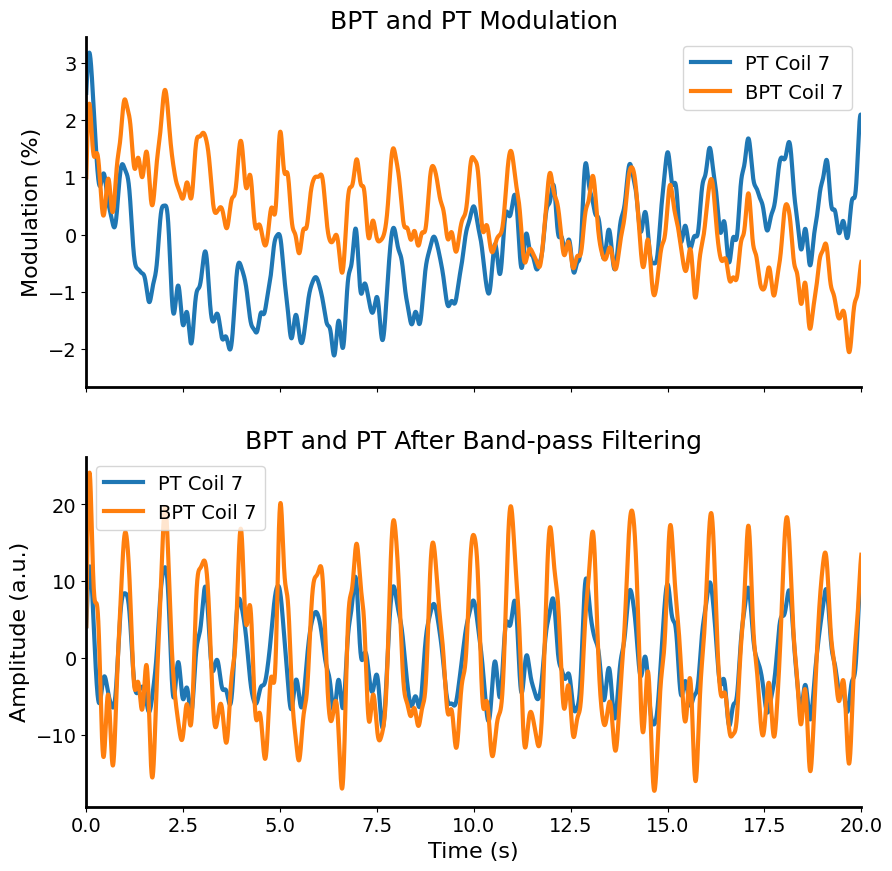

In [51]:
inpdir = os.path.join(data_dir, "supp_air")
pl.plot_supp_fig(inpdir, c=7, tr=3.1e-3, labels = ["PT", "BPT"], ylabels = ["Modulation (%)", "Amplitude (a.u.)"],
              titles = ["BPT and PT Modulation", "BPT and PT After Band-pass Filtering"],
              figsize=(10,10))